In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image


In [60]:
def process_image_and_predict(image_filename: str,
                               model_filename: str,
                               dir_path: str='./../data/raw/new_images/',
                               dir_path_models: str='./../models/'):
    """
    Reads an image, resizes it to 48x48, converts to grayscale, loads an h5 model,
    gets predictions for the image data with 3 channels, and plots the image along with
    a bar plot of predicted classes.

    Inputs:
    - image_filename: name of the image file
    - model_filename: name of the h5 model file
    - dir_path: path to the directory containing the image files
    - dir_path_models: path to the directory containing the h5 model files

    Outputs:
    - None (displays the image and the bar plot)
    """


    # Reading and processing image
    image_path = os.path.join(dir_path, image_filename)
    img = Image.open(image_path)
    img_resized = img.resize((48, 48))
    img_gray = img_resized.convert('L')
    img_array = np.array(img_gray) / 255.0  # Normalize pixel values

    # Changing image to 3 channels
    img_array = np.expand_dims(img_array, axis=-1)
    img_array = np.repeat(img_array, 3, axis=-1)

    # Loading model
    model_path = os.path.join(dir_path_models, model_filename)
    model = tf.keras.models.load_model(model_path)

    # Getting predictions
    pred_proba = model.predict(np.expand_dims(img_array, axis=0))

    # Defining class labels
    labels = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

    # Plotting image and prediction barplot
    fig, axes = plt.subplots(1, 2, figsize=(6, 4), facecolor='black')

    axes[0].imshow(img_gray, cmap='gray', aspect='auto', vmin=0, vmax=255)
    axes[0].set_title(f'Predicted label: {labels[np.argmax(pred_proba[0])]}', color='white', fontsize=11)
    axes[0].axis('off')

    axes[1].patch.set_facecolor('black')
    axes[1].barh(labels, pred_proba[0], color=sns.color_palette("Set2"), edgecolor='white')
    axes[1].set_title('Prediction probabilities', color='white', fontsize=11)
    axes[1].spines['bottom'].set_color('white')
    axes[1].spines['left'].set_color('white')
    axes[1].tick_params(axis='x', colors='white')
    axes[1].tick_params(axis='y', colors='white')
    axes[1].yaxis.set_tick_params(labelsize=9)

    fig.set_facecolor('black')

    fig.suptitle('Facial expression classification', fontsize=13, color='white')
    fig.tight_layout()
    plt.show()

1/1 [==============================] - 1s 689ms/step


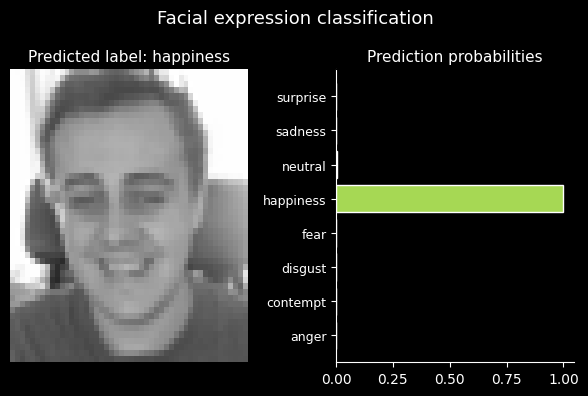

In [63]:
process_image_and_predict(image_filename='tim-happy.png', model_filename='ResNet50_model.h5')